# Video Game Sales 

### Insight Data Challenge_1A


***

## Goal
You work for a data science consulting company. A major video game production company has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:
<li>Q1: What are some major differences between the North American, European, and Japanese video game markets?
<li>Q2: What video game genres are trending in each market?
<li>Q3: What features about a video game are most indicative of its success?

## The Data 
This dataset contains a list of video games with sales greater than 100,000 copies.
<ol>
 
    
    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.
</li>

***

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pf
from collections import Counter

# VisualiZation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [188]:
# Load the data
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data exploration

In [8]:
# check missing data and overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
# check year range: 
df.Year.min(),df.Year.max()

(1980.0, 2020.0)

In [10]:
# create a feature for how long the game was on market
df['product_life'] = 2020 - df.Year

In [18]:
# general profiling of the data
profile = pf.ProfileReport(df, title='Pandas Profiling Report')

In [21]:
profile

## Q1: What are some major differences between the North American, European, and Japanese video game markets?
<ol>
    <li> 'Rank' is highly correlated with 'Global_Sales', therefore, we only need to consider 'Global_Sales'.
    <li> 'Name' is not useful, it contains too many unique values, but 'Genre' may provide most information of it. 
    <li> What features would show different pattern in correlation with EU, JP and NA sales?
        <ol>
            <li> Platform 
            <li> Genre
            <li> Publisher
            <li> product_life
    

In [29]:
# the average sales for each platform in different regions
platform_sales = df.groupby('Platform').mean()[['NA_Sales','EU_Sales', 'JP_Sales']]
platform_sales.fillna(0,inplace=True)

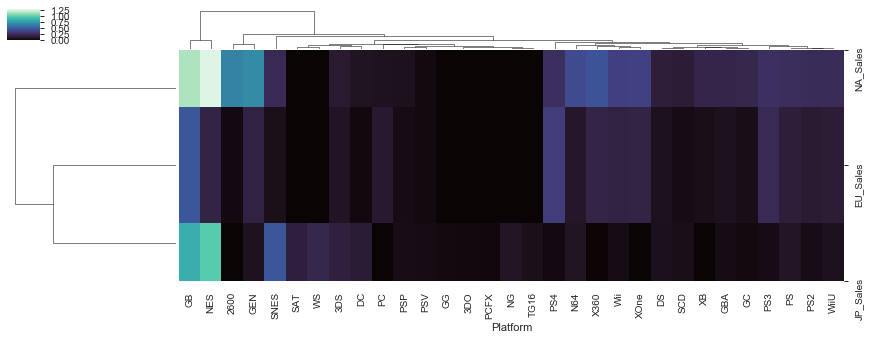

In [34]:
sns.clustermap(platform_sales.T,figsize=(15, 5),cmap="mako")

### Q1A1: Platform difference between EU, NA and JP market
<li> EU market don't have high sales in certain platform, top5 platforms are: GB, PS4,PS3, X360,Wii,XOne.
<li> JP and NA market favor GB, NES and SNES.
<li> 2600, GEN are only popular in NA market.
<li> Generally, NA market has most sales, JP next, and EU has fewest sales.

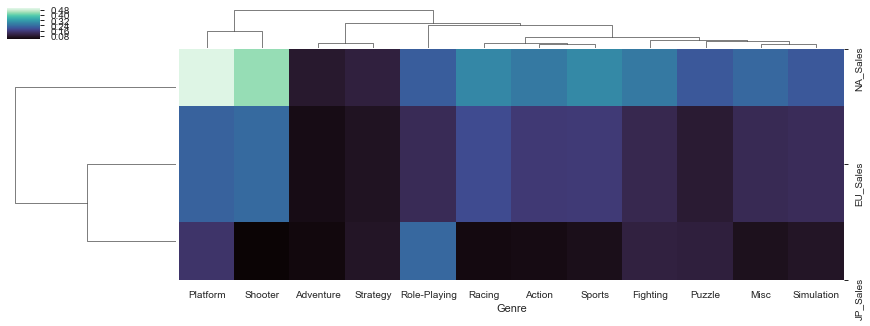

In [36]:
# the average sales for each Genre in different regions
genre_sales = df.groupby('Genre').mean()[['NA_Sales','EU_Sales', 'JP_Sales']]
genre_sales.fillna(0,inplace=True)
sns.clustermap(genre_sales.T,figsize=(15, 5),cmap="mako")

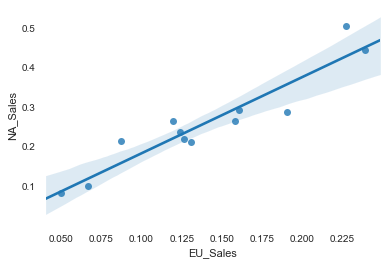

In [39]:
sns.regplot(x=genre_sales['EU_Sales'],y=genre_sales['NA_Sales'])

### Q1A2: Genre difference between EU, NA and JP market
<li> EU and NA Sales are highly correlated.
<li> Top games for JP are: Role-playing, Platform and Fightting.
<li> Top games in EU and NA are Platform, Shooting and Racing.

In [73]:
# the average sales for each Publisher in different regions

publisher_sales = df.groupby('Publisher').mean()[['NA_Sales','EU_Sales', 'JP_Sales']]


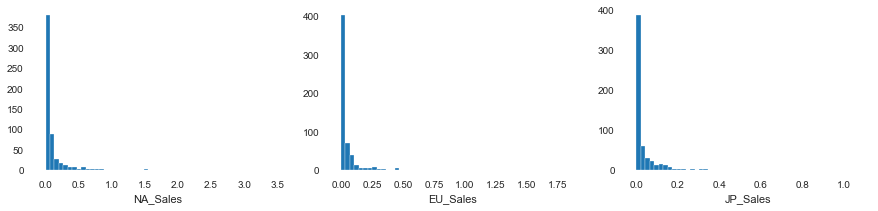

In [66]:
# plot distribution of the sales
fig = plt.figure(figsize=(15,3))
i = 1
ax = []
for col in ['NA_Sales','EU_Sales','JP_Sales']:
    ax = fig.add_subplot(1,3,i)
    ax.hist(publisher_sales[col],bins=50)
    plt.xlabel(col)
    i += 1

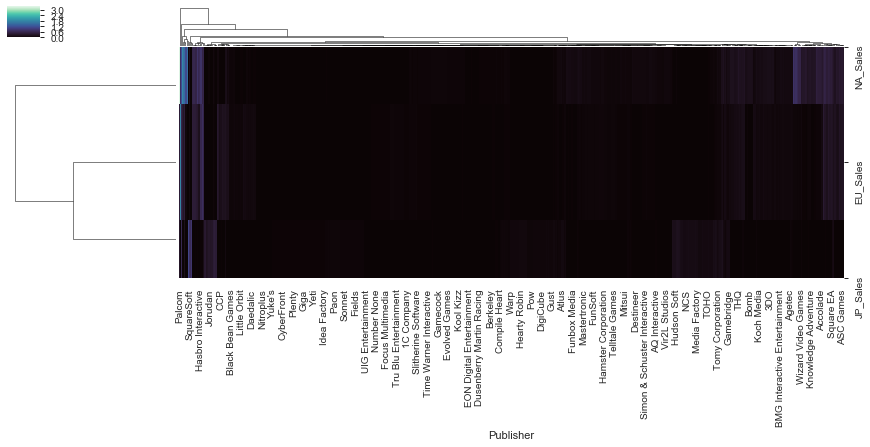

In [67]:
sns.clustermap(publisher_sales.T,figsize=(15, 5),cmap="mako")

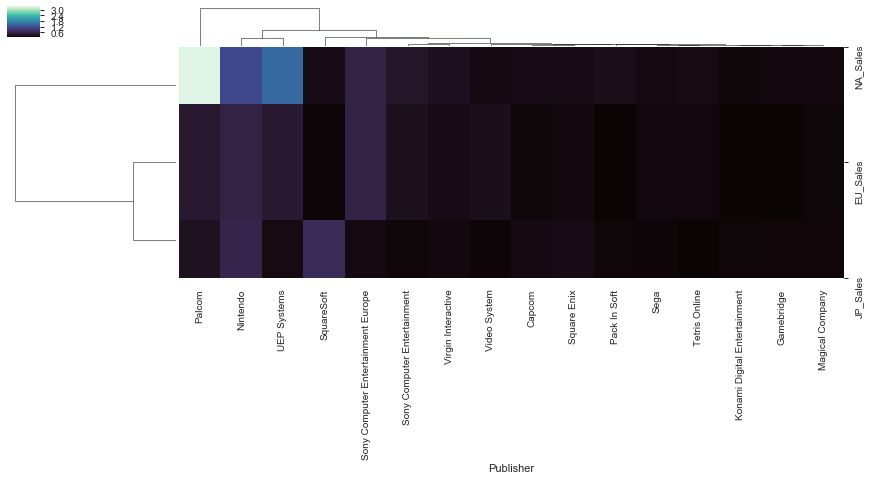

In [76]:
publisher_sales = publisher_sales.loc[(publisher_sales['EU_Sales']>0.05) &\
                                      (publisher_sales['NA_Sales']>0.05) &\
                                      (publisher_sales['JP_Sales']>0.05)]
sns.clustermap(publisher_sales.T,figsize=(15, 5),cmap="mako")

### Q1A3: Publisher difference between EU, NA and JP market
<li> SquareSoft is only popular in JP.
<li> Palcom, UEP and Sony are more popular in NA and EU.

In [77]:
# Product life difference
life_sales = df.groupby('product_life').mean()[['NA_Sales','EU_Sales', 'JP_Sales']]

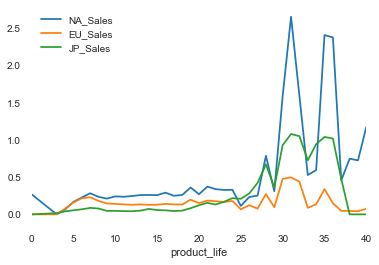

In [80]:
_=life_sales.plot()

### Q1A4: Product life pattern is similar in three regions.  

# Q2: What video game genres are trending in each market?

In [99]:
# group data for genres and order by publishing year

genre_trend = df.sort_values('Year')[['Genre','Year','NA_Sales','EU_Sales', 'JP_Sales']]\
                .groupby(['Genre','Year']).sum().reset_index()

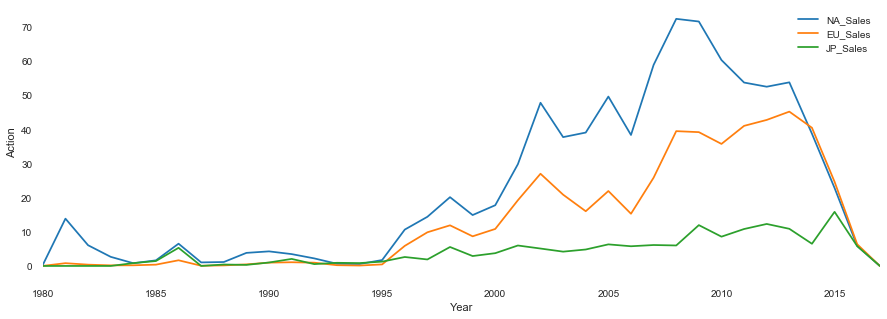

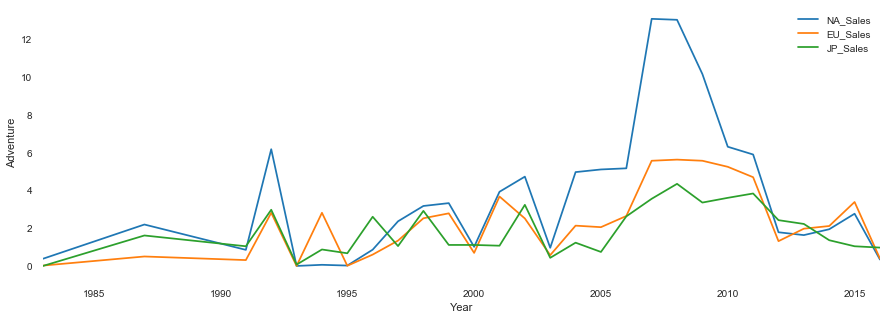

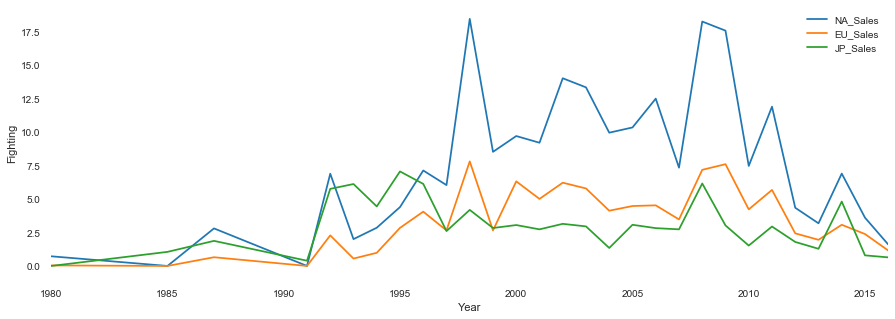

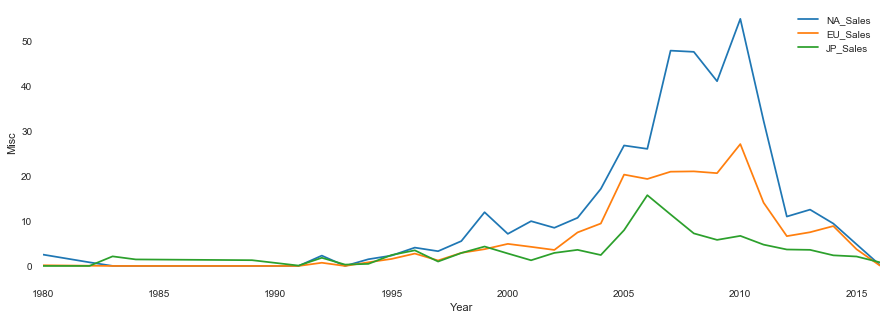

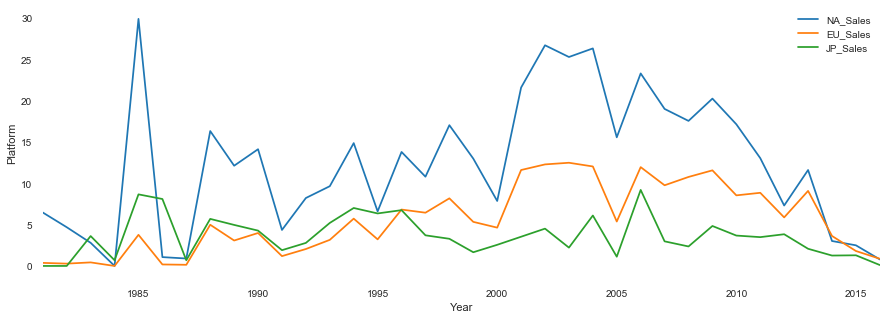

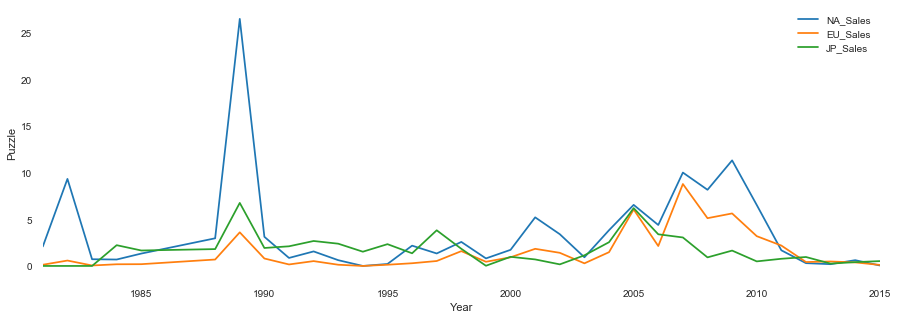

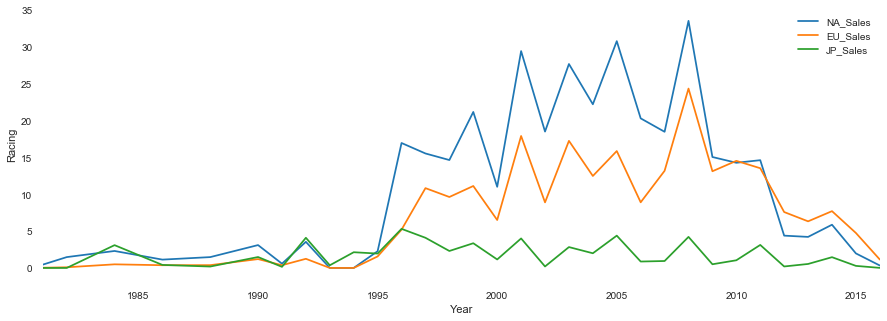

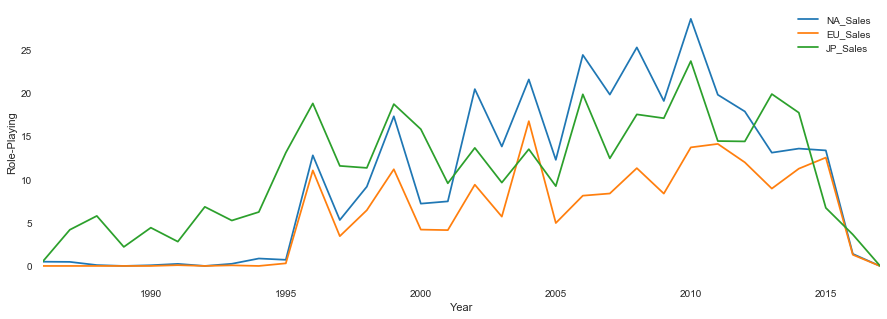

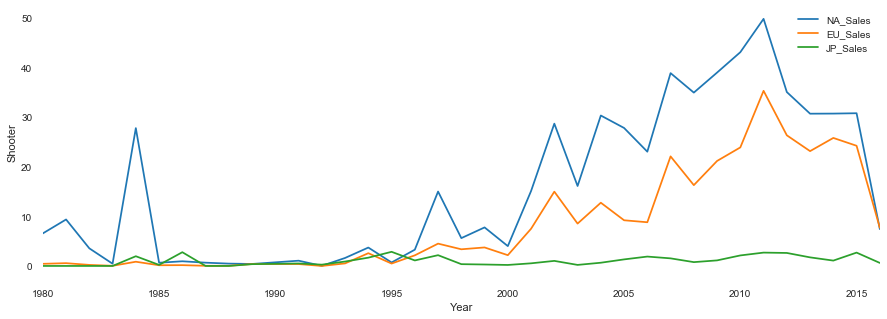

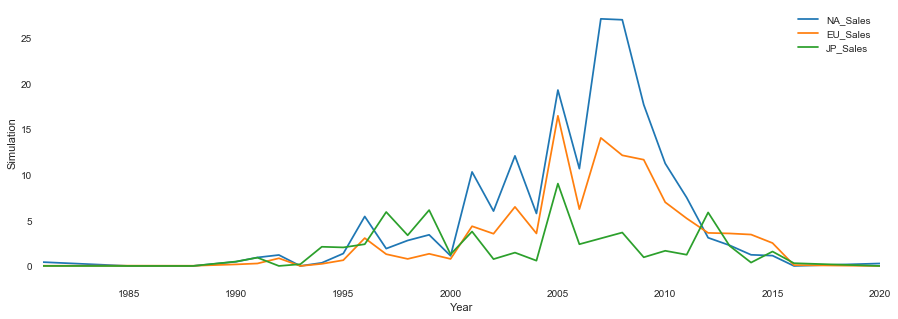

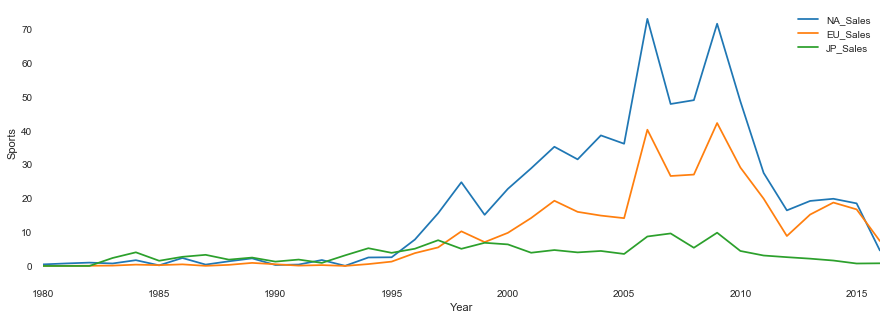

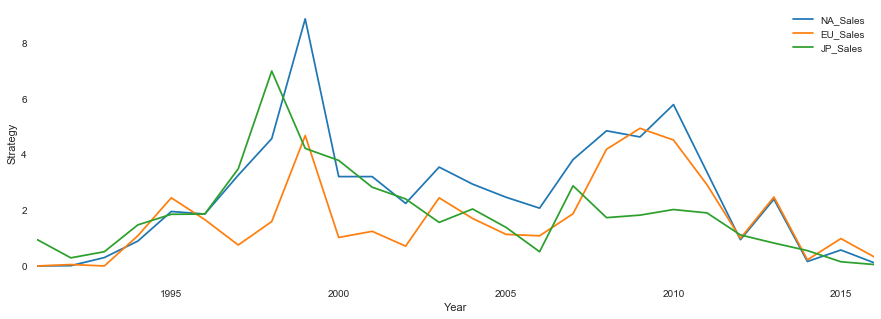

In [110]:
# trending for each genre over time
for genre in genre_trend['Genre'].unique():
    genre_trend.loc[genre_trend['Genre'] == genre].set_index('Year')\
    [['NA_Sales','EU_Sales', 'JP_Sales']].plot(figsize=(15,5))
    
    plt.ylabel(genre)

### Q2A:  
The following genres are trending in NA and EU market:
<b><ol> Action, Racing, Shooter, Sports, Fighting, Role-Playing </ol></b>

The following genres are trending in JP:
<b><ol> Role-Playing </ol></b>

# Q3: What features about a video game are most indicative of its success?

<ol> mining important features for the success of the game</ol>
<ol> using Sales as outcome</ol>

In [189]:
# dealing with missing value

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [190]:
# impute year data if year is included in 'Name'
year_null = df[df['Year'].isnull()]
year_null.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [191]:
from tqdm import tqdm

idx = []
for i in tqdm(range(year_null.shape[0])):
    word_list = year_null['Name'].iloc[i].split(' ') # split the Name into words
    for word in word_list: # check each word to see whether it contain year information
        if len(word) == 4: # if it has 4 digit
            try:
                year = int(word) # if it could be converted to integer
                
                print(word_list) # serenity check
                year_null['Year'].iloc[i] = year # impute the year information get from 'Name'
                idx.append(i) # store the location for retrieving the index information
            except:
                continue

100%|██████████| 271/271 [00:00<00:00, 6128.32it/s]

['Madden', 'NFL', '2004']
['FIFA', 'Soccer', '2004']
['wwe', 'Smackdown', 'vs.', 'Raw', '2006']
['NASCAR', 'Thunder', '2003']
['Madden', 'NFL', '2002']
['NFL', 'GameDay', '2003']
['NBA', 'Live', '2003']
['All-Star', 'Baseball', '2005']
['NBA', 'Live', '2003']
['All-Star', 'Baseball', '2005']
['Tour', 'de', 'France', '2011']
['Sega', 'Rally', '2006']
['Football', 'Manager', '2007']
['PDC', 'World', 'Championship', 'Darts', '2008']
['PDC', 'World', 'Championship', 'Darts', '2008']


In [192]:
year_null.iloc[idx].index

Int64Index([  179,   377,   470,  1649,  3501,  4797,  5162,  5669,  5901,
             8929, 12922, 13870, 15739, 15865, 16057],
           dtype='int64')

In [193]:
df_index = year_null.iloc[idx].index

for i in range(len(idx)): # impute year information according to year
   
    df['Year'].iloc[df_index[i]]= year_null.iloc[idx[i]]['Year']
    

In [194]:
df['Year'].isnull().sum()

256

In [195]:
# impute missing publisher with 'Others'
df['Publisher'] = df['Publisher'].fillna('Others')

In [196]:
# drop other missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16342 non-null float64
Genre           16598 non-null object
Publisher       16598 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [199]:
# drop other missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16342 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16342 non-null int64
Name            16342 non-null object
Platform        16342 non-null object
Year            16342 non-null float64
Genre           16342 non-null object
Publisher       16342 non-null object
NA_Sales        16342 non-null float64
EU_Sales        16342 non-null float64
JP_Sales        16342 non-null float64
Other_Sales     16342 non-null float64
Global_Sales    16342 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [201]:
df['product_life'] = 2020 - df.Year

### Modeling

In [200]:
from lightgbm import LGBMRegressor

In [209]:
# Use Global_sales as outcome
y = df['Global_Sales']
X = df[['Platform','Genre','Publisher','product_life']]

In [210]:
# label encoding

dics = {}
for col in ['Platform','Genre','Publisher']:
    dics[col] = {}
    i = 1
    for key in X[col].unique():
        dics[col][key] = i
        i += 1
    
    X[col] = X[col].map(dics[col])

In [211]:
X.head()

,Platform,Genre,Publisher,product_life
0,1,1,1,14.0
1,2,2,1,35.0
2,1,3,1,12.0
3,1,1,1,11.0
4,3,4,1,24.0


In [216]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [218]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [317]:
# basic model for lightGBM tree
rg = LGBMRegressor(categorical_feature="0,1,2")
rg.fit(Xtrain,ytrain)
pred = rg.predict(Xtest)
      

In [318]:
# testing score
print("Mean_squared_error(MSE) = {0:0.2f}\nMean_absolute_error(MAE) = {1:0.2f}\nR_square = {2:0.2f}\n".format(\
                                                                                          mean_squared_error(ytest, pred),\
                                                                                          mean_absolute_error(ytest,pred),\
                                                                                          r2_score(ytest,pred)))

Mean_squared_error(MSE) = 1.37
Mean_absolute_error(MAE) = 0.50
R_square = 0.12



In [236]:
rg

LGBMRegressor(boosting_type='gbdt', categorical_feature='0,1,2',
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.1, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

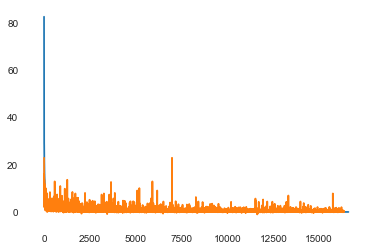

In [322]:
# visuallization of real and predicted
plt.plot(y)
plt.plot(rg.predict(X))

### the model is too off the real, therefore it might not be a good model to interpret the importance of feature
## let's try hypothesis study since there are only 4 features to explore

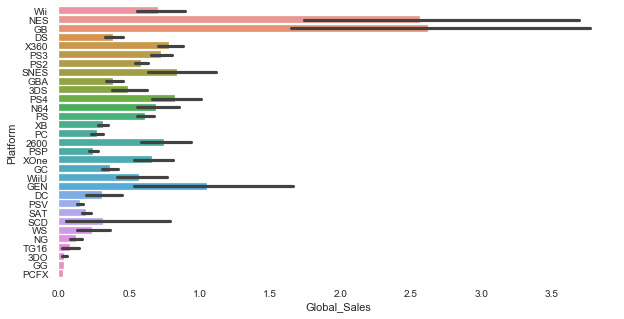

In [265]:
# explore feature Platform
fig = plt.figure(figsize=(10,5))
sns.barplot(y=df['Platform'],x=df['Global_Sales'])

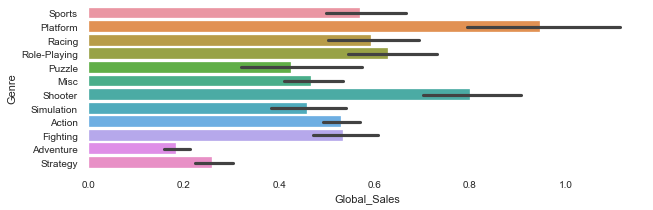

In [263]:
# Explore feature Genre
fig = plt.figure(figsize=(10,3))
sns.barplot(y=df['Genre'],x=df['Global_Sales'])

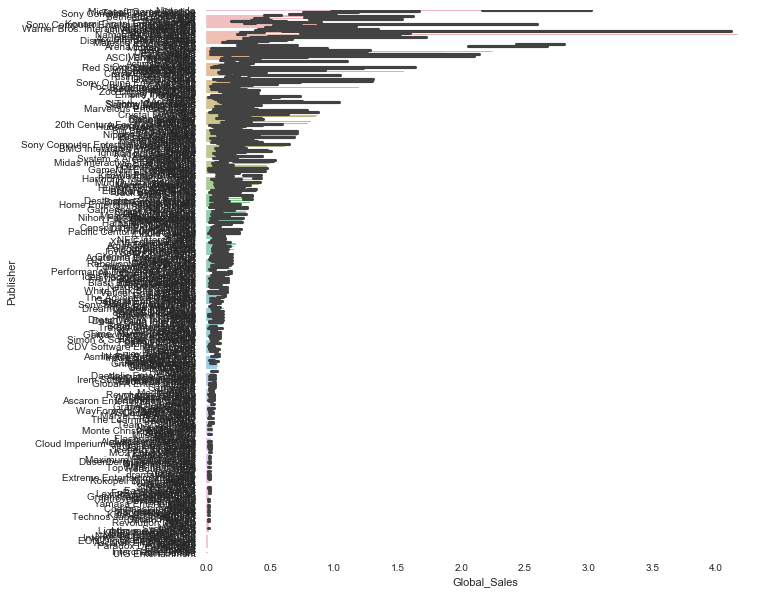

In [267]:
# Explore feature Publisher
fig = plt.figure(figsize=(10,10))
sns.barplot(y=df['Publisher'],x=df['Global_Sales'])

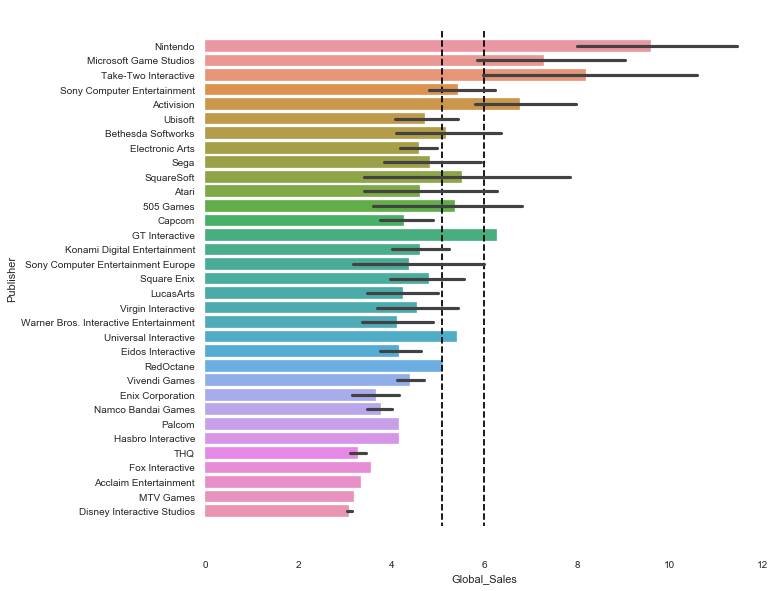

In [283]:
# Explore feature Publisher with global sales bigger than 3
df2 = df.loc[df['Global_Sales']>3]
fig = plt.figure(figsize=(10,10))
sns.barplot(y=df2['Publisher'],x=df2['Global_Sales'])
plt.vlines(ymin=-1,ymax=33, x=6, linestyles='dashed')
plt.vlines(ymin=-1,ymax=33, x=5.1, linestyles='dashed')

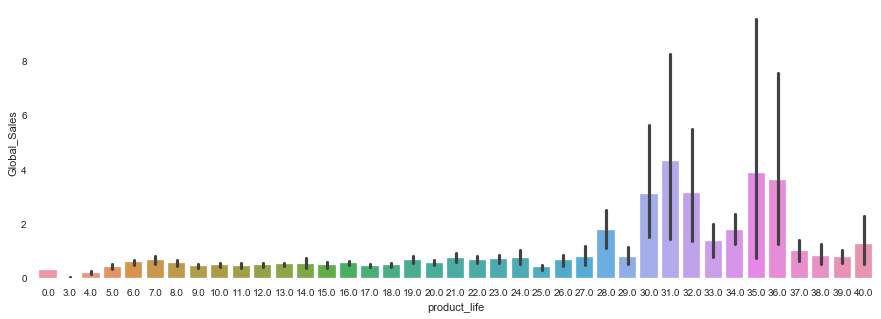

In [290]:
# Explore feature product life
fig = plt.figure(figsize=(15,5))
sns.barplot(x=df['product_life'],y=df['Global_Sales'])

### Q3A: The features values that are mostly associated with the high sales:
1. Platform:
    NES, GB, GEN
2. Genre:
    Platform, Shooter, Role-playing
3. Publisher:
    Nintendo, Take-two Interactive,Microsoft Game Studio, Activision
4. Product life:
    Two peaks around age 31 and 35. Corresponding to the games published in 1985-1989.
    
#### Notice: The platforms are correlated with product life, which make sense, because game platforms evolveds over time.
    

## Interestingly, the old games earn more than the new games, which since those games and platforms are updated, and no longer available, it make sense we only focus on rescent years. According to the 'product_life' and 'global_sales' relationship, we see another peak around 7, therefore, let's focus on the rescent 10 years. 

In [291]:
df_new = df.loc[df['product_life']<10]

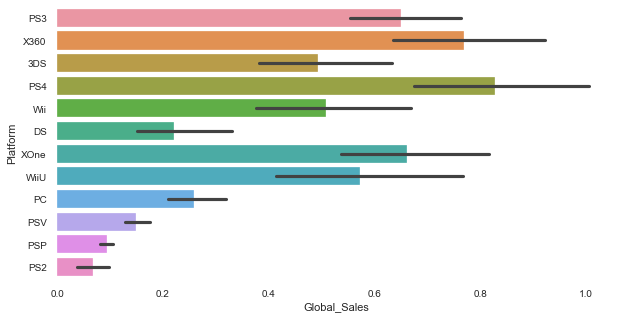

In [292]:
# explore feature Platform
fig = plt.figure(figsize=(10,5))
sns.barplot(y=df_new['Platform'],x=df_new['Global_Sales'])

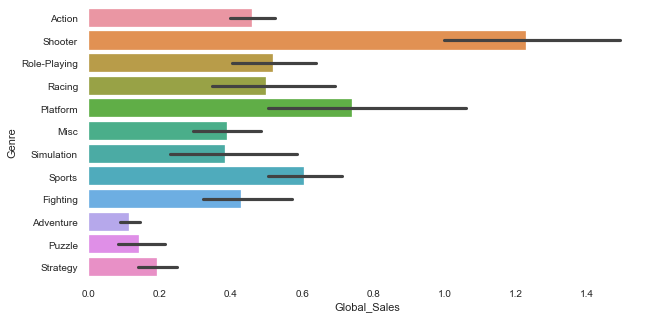

In [293]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=df_new['Genre'],x=df_new['Global_Sales'])

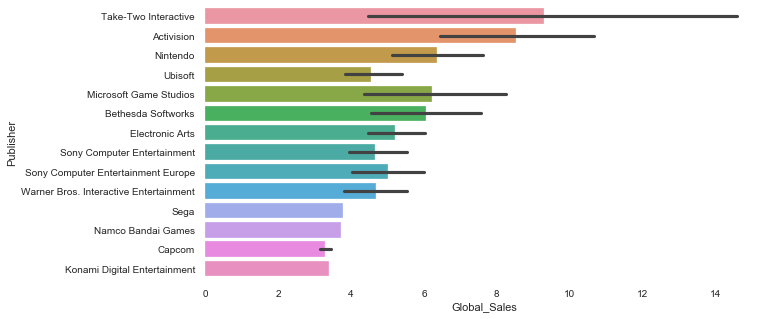

In [295]:
df3 = df_new.loc[df['Global_Sales']>3]
fig = plt.figure(figsize=(10,5))
sns.barplot(y=df3['Publisher'],x=df3['Global_Sales'])

### Q3A2: The features values that are mostly associated with the high sales in rescent 10 years:
1. Platform:
    PS4, PS3, X360, XOne, WiiU
2. Genre:
    Shooter, Platfrom, Sports
3. Publisher:
    Take-two Interactive, Activision, Nintendo, Microsoft Game Studio, Bethesda Softworks
4. Product life:
    Peaked at 7 years!
    